# 2.2 신경망을 위한 데이터 표현

이전 예제에서 텐서(tensor)라 부르는 다차원 넘파이 배열에 데이터를 저장하는 것부터 시작했습니다.
텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습입니다(텐서에서는 차원(dimension)을 종종 축(axis)이라고 부릅니다).

### 2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)(또는 스칼라 텐서, 0차원 텐서, 0D 텐서)라고 부릅니다.
텐서의 축 개수를 랭크(rank)라고도 부릅니다.

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

### 2.2.2 벡터(1D 텐서)

숫자의 배열을 벡터(vector) 또는 1D 텐서라고 부릅니다. 1D 텐서는 딱 하나의 축을 가집니다.

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

이 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부릅니다. 5D 벡터와 5D 텐서를 혼동하지 마세요! 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것입니다

### 2.2.3 행렬(2D 텐서)
벡터의 배열이 행렬(matrix) 또는 2D 텐서입니다. 행렬에는 2개의 축이 있습니다(보통 행(row)과 열(column)이라고 부릅니다).

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 2.2.4 3D 텐서와 고차원 텐서

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 2.2.5 핵심 속성
텐서는 3개의 핵심 속성으로 정의됩니다.
- 축의 개수(랭크): 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있습니다. ndim 속성과 같습니다.
- 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는 지를 나타낸 파이썬의 튜플(tuple)입니다
- 데이터 타입(dtype): float32, uint8 등

MNIST 예제를 다시 들여다봅시다

In [7]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images.ndim

3

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images.dtype

dtype('uint8')

#### 코드 2-6 다섯 번째 이미지 출력하기

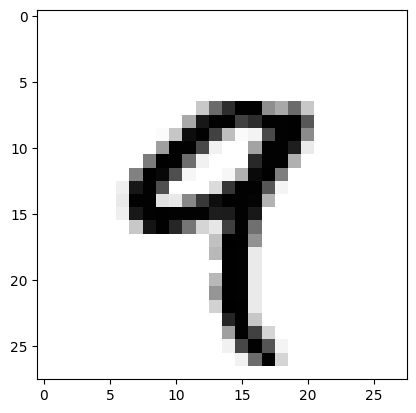

In [11]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 넘파이로 텐서 조작하기
배열에 있는 특정 원소들을 선택하는 것을 슬라이싱(slicing)이라고 합니다.

In [12]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [13]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [14]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [15]:
# 이미지의 오른쪽 아래 14x14 픽셀 선택
my_slice = train_images[:, 14:, 14:]

In [16]:
# 음수 인덱스 이용해서 정중앙의 14x14 픽셀 선택
my_slice = train_images[:, 7:-7, 7:-7]

### 2.2.7 배치 데이터
일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0번째 축)은 샘플 축(sample axis)입니다(이따금 샘플 차원(sample dimension)이라고도 부릅니다).
딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않습니다. 그 대신 데이터를 작은 배치(batch)로 나눕니다

##### 크기가 128인 배치
batch = train_images[:128]

##### 그다음 배치
batch = train_images[128:256]

##### n번째 배치
batch = train_images[128 * n: 128 * (n + 1)]

### 2.2.8 텐서의 실제 사례
우리가 사용할 데이터는 대부분 다음 중 하나에 속할 것입니다.
- 벡터 데이터: (samples, features) 크기의 2D 텐서
- 시계열 데이터 또는 시퀀스(sequence) 데이터: (samples, timesteps, features) 크기의 3D 텐서
- 이미지: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서